In [228]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix

In [229]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Input
from keras.utils import to_categorical

In [230]:
df = pd.read_csv("D:\Kaggle\diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [232]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

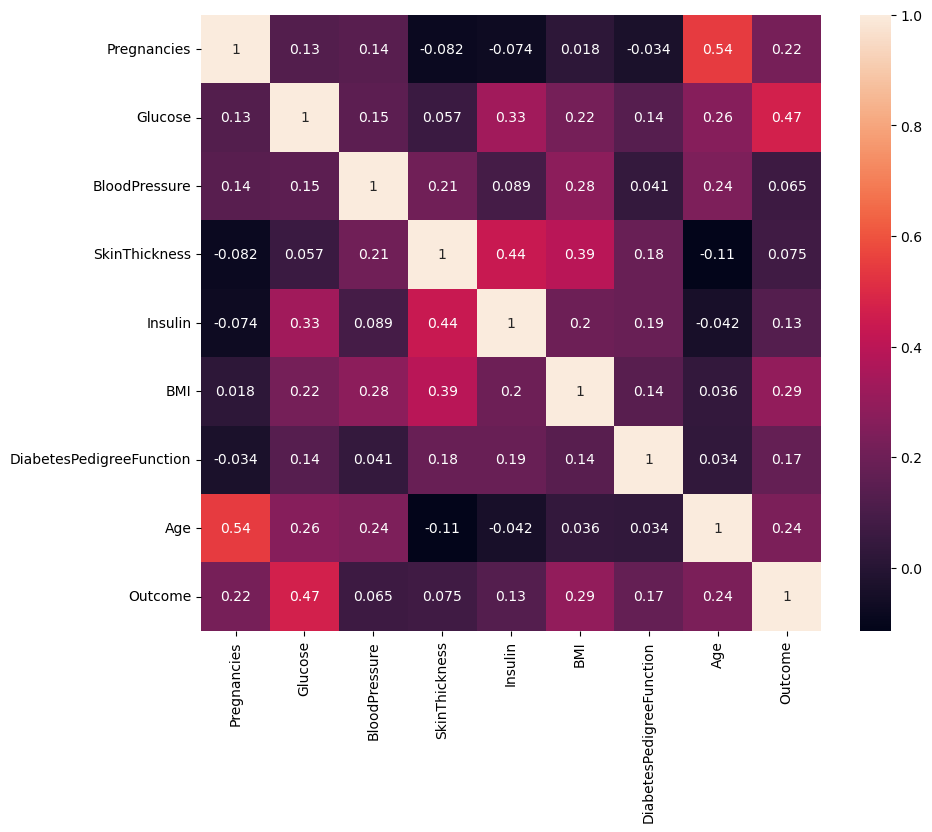

In [233]:
f, ax = plt.subplots(1, figsize=(10,8))
sns.heatmap(df.corr(), annot=True, ax=ax)

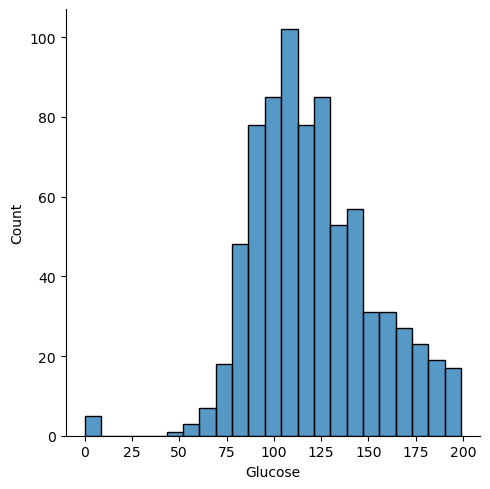

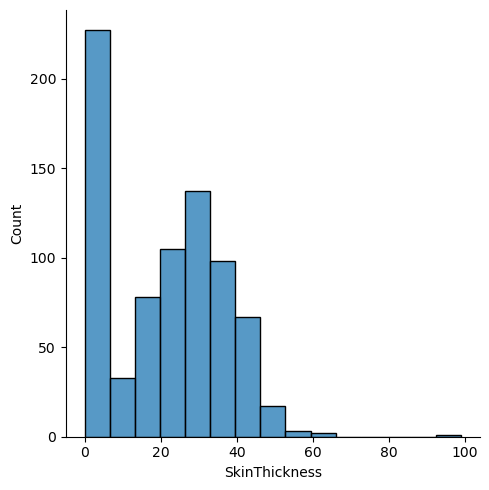

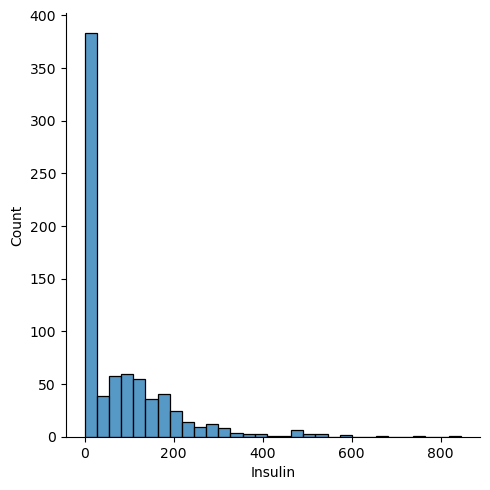

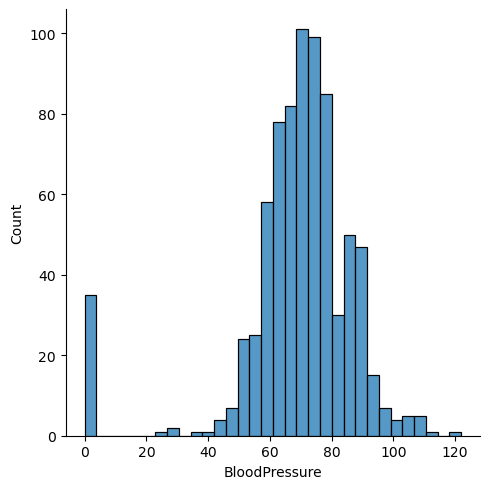

In [234]:
sns.displot(df['Glucose'])
sns.displot(df['SkinThickness'])
sns.displot(df['Insulin'])
sns.displot(df['BloodPressure'])

In [235]:

df[['Glucose', 'SkinThickness','Insulin','BloodPressure','BMI']] =  df[['Glucose','SkinThickness', 'Insulin','BloodPressure','BMI']].replace(0, pd.NA)

df.fillna(df.mean(),inplace = True)

C:\Users\James Frye\AppData\Local\Temp\ipykernel_24908\3702414101.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(df.mean(),inplace = True)


In [207]:
X = df.drop('Outcome', axis=1).values
y = df.Outcome.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=40)
print(X_train.shape); print(X_test.shape)

(614, 8)
(154, 8)


In [208]:
df = df.astype(int)

In [209]:
 print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
 print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

 from imblearn.over_sampling import SMOTE
 sm = SMOTE(random_state = 2)
 X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

 print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
 print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

 print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
 print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 209
Before OverSampling, counts of label '0': 405 

After OverSampling, the shape of train_X: (810, 8)
After OverSampling, the shape of train_y: (810,) 

After OverSampling, counts of label '1': 405
After OverSampling, counts of label '0': 405


In [210]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

count_classes = y_test_res.shape[1]
print(count_classes)

2


In [211]:
model = Sequential()
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['Accuracy', 'Precision', 'Recall'])

In [212]:
history = model.fit(X_train, y_train, validation_data = (X_test, y_test),  epochs=40)

Epoch 1/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 60s 3s/step - Accuracy: 0.5309 - Precision: 0.5309 - Recall: 0.5309 - loss: 3.0864 - val_Accuracy: 0.6429 - val_Precision: 0.6429 - val_Recall: 0.6429 - val_loss: 1.1737
Epoch 2/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - Accuracy: 0.6205 - Precision: 0.6205 - Recall: 0.6205 - loss: 1.1714 - val_Accuracy: 0.5065 - val_Precision: 0.5065 - val_Recall: 0.5065 - val_loss: 1.0932
Epoch 3/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - Accuracy: 0.6254 - Precision: 0.6254 - Recall: 0.6254 - loss: 0.8579 - val_Accuracy: 0.6623 - val_Precision: 0.6623 - val_Recall: 0.6623 - val_loss: 0.8881
Epoch 4/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - Accuracy: 0.6824 - Precision: 0.6824 - Recall: 0.6824 - loss: 0.6629 - val_Accuracy: 0.6429 - val_Precision: 0.6429 - val_Recall: 0.6429 - val_loss: 0.7017
Epoch 5/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - Accuracy: 0.6466 - Precision: 0.6466 - Recall: 0.6466 - loss: 0.7039 - val_Accuracy: 0.6429 - val_Precision: 0.6429 

In [213]:
pred_train= model.predict(X_train)
scores = model.evaluate(X_train, y_train, verbose=0)
print('Accuracy on training data: {}% \n Error on training data: {}'.format(scores[1], 1 - scores[1]))   
 
pred_test= model.predict(X_test)
scores2 = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy on test data: {}% \n Error on test data: {}'.format(scores2[1], 1 - scores2[1]))

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Accuracy on training data: 0.7622149586677551% 
 Error on training data: 0.23778504133224487
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Accuracy on test data: 0.6883116960525513% 
 Error on test data: 0.31168830394744873


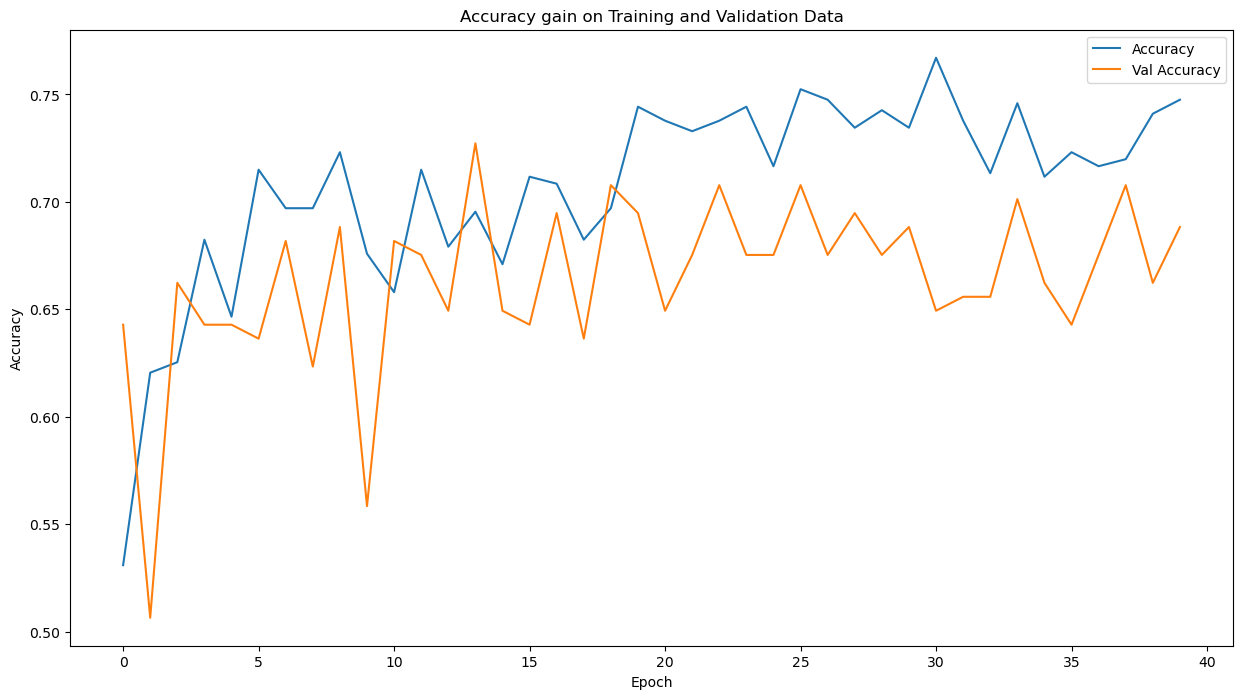

In [214]:
plt.figure(figsize=(15,8))
plt.plot(history.history['Accuracy'])
plt.plot(history.history['val_Accuracy'])
plt.title('Accuracy gain on Training and Validation Data')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Accuracy', 'Val Accuracy'], loc='upper right')
plt.show()

In [215]:
ypred = model.predict(X_test, verbose=1)
ypred = np.argmax(ypred, axis=1)

print(classification_report(np.argmax(y_test, axis=1), ypred))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
              precision    recall  f1-score   support

           0       0.70      0.87      0.78        95
           1       0.66      0.39      0.49        59

    accuracy                           0.69       154
   macro avg       0.68      0.63      0.63       154
weighted avg       0.68      0.69      0.67       154



In [221]:
model = Sequential()
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['Accuracy', 'Precision', 'Recall'])


In [222]:
history = model.fit(X_train, y_train, validation_data = (X_test, y_test),  epochs=40)

Epoch 1/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - Accuracy: 0.6303 - Precision: 0.5000 - Recall: 1.0000 - loss: 1.6513 - val_Accuracy: 0.6039 - val_Precision: 0.5000 - val_Recall: 1.0000 - val_loss: 1.7019
Epoch 2/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - Accuracy: 0.6059 - Precision: 0.5000 - Recall: 1.0000 - loss: 1.3144 - val_Accuracy: 0.6039 - val_Precision: 0.5000 - val_Recall: 1.0000 - val_loss: 0.8405
Epoch 3/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - Accuracy: 0.6287 - Precision: 0.5000 - Recall: 1.0000 - loss: 0.7901 - val_Accuracy: 0.5974 - val_Precision: 0.5000 - val_Recall: 1.0000 - val_loss: 0.9770
Epoch 4/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - Accuracy: 0.6384 - Precision: 0.5000 - Recall: 1.0000 - loss: 0.9927 - val_Accuracy: 0.6039 - val_Precision: 0.5000 - val_Recall: 1.0000 - val_loss: 1.5547
Epoch 5/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - Accuracy: 0.6205 - Precision: 0.5000 - Recall: 1.0000 - loss: 0.9481 - val_Accuracy: 0.5844 - val_Precision: 0.5000

In [223]:
pred_train= model.predict(X_train)
scores = model.evaluate(X_train, y_train, verbose=0)
print('Accuracy on training data: {}% \n Error on training data: {}'.format(scores[1], 1 - scores[1]))   
 
pred_test= model.predict(X_test)
scores2 = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy on test data: {}% \n Error on test data: {}'.format(scores2[1], 1 - scores2[1]))

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Accuracy on training data: 0.7508143186569214% 
 Error on training data: 0.2491856813430786
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Accuracy on test data: 0.6558441519737244% 
 Error on test data: 0.34415584802627563


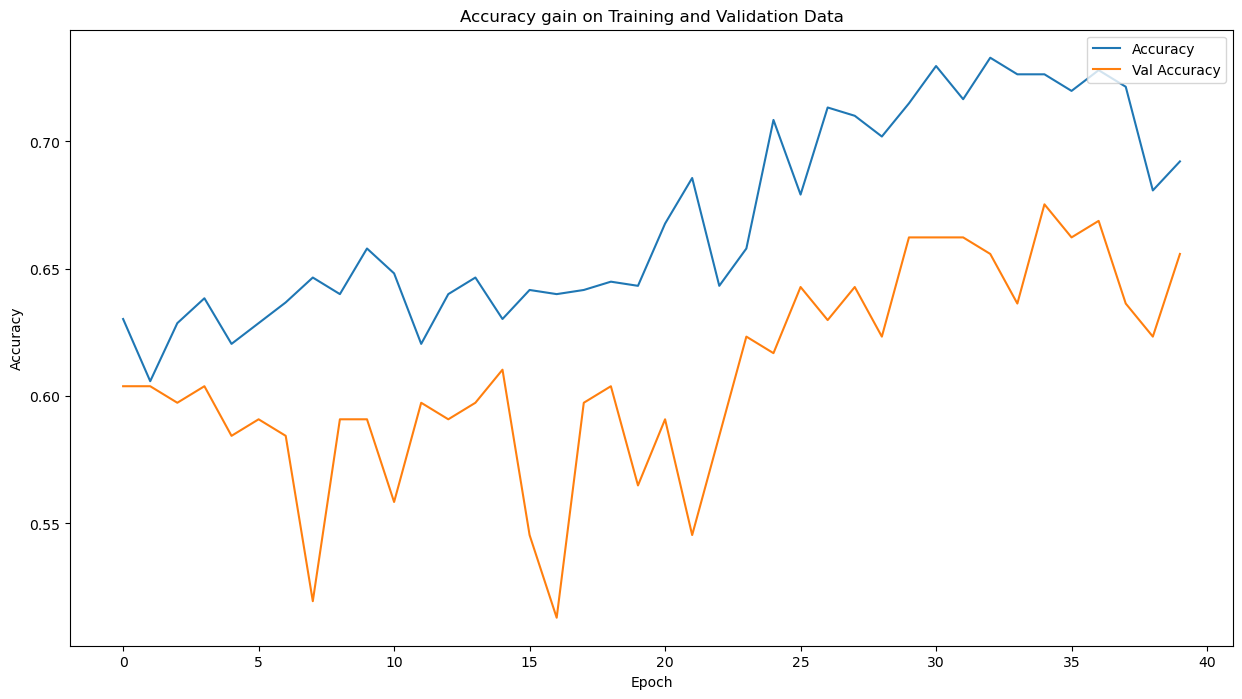

In [224]:
plt.figure(figsize=(15,8))
plt.plot(history.history['Accuracy'])
plt.plot(history.history['val_Accuracy'])
plt.title('Accuracy gain on Training and Validation Data')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Accuracy', 'Val Accuracy'], loc='upper right')
plt.show()

In [225]:
ypred = model.predict(X_test, verbose=1)
ypred = np.argmax(ypred, axis=1)

print(classification_report(np.argmax(y_test, axis=1), ypred))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
              precision    recall  f1-score   support

           0       0.68      0.80      0.74        95
           1       0.56      0.41      0.47        59

    accuracy                           0.65       154
   macro avg       0.62      0.60      0.60       154
weighted avg       0.64      0.65      0.64       154



In [226]:
y_test = np.argmax(y_test, axis=1)
result = confusion_matrix(y_test, ypred, normalize='pred')



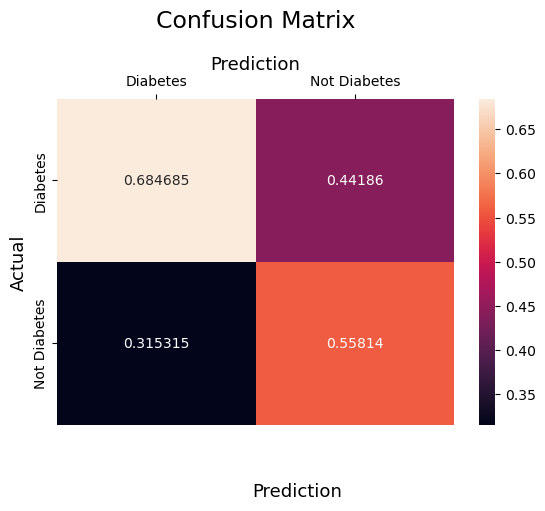

In [227]:
sns.heatmap(result, 
            annot=True,
            fmt='g', 
            xticklabels=['Diabetes','Not Diabetes'],
            yticklabels=['Diabetes','Not Diabetes'])
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top') 
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.show()

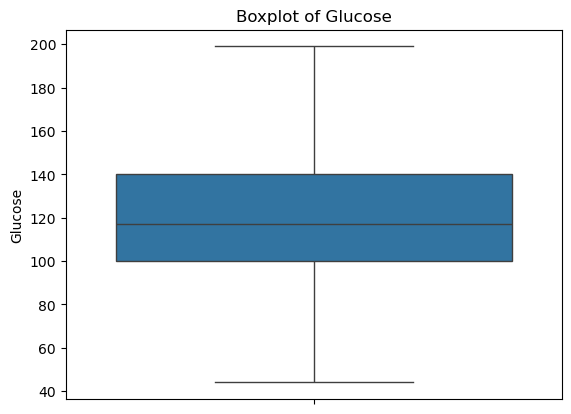

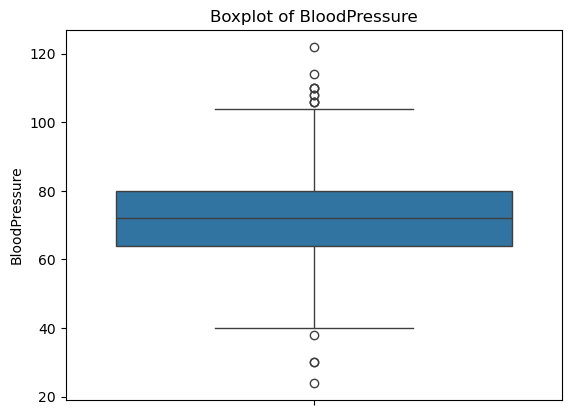

In [194]:
sns.boxplot(df['Glucose'])
plt.title('Boxplot of Glucose')
plt.show()

sns.boxplot(df['BloodPressure'])
plt.title('Boxplot of BloodPressure')
plt.show()